In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import timeit

In [81]:
x_train = pd.read_csv("trainingpix.csv",header=None)
y_train = pd.read_csv("traininglabels.csv",header=None)
x_test = pd.read_csv("testingpix.csv",header=None)
y_test= pd.read_csv("testinglabels.csv",header=None)

In [82]:
x_train = np.reshape(x_train.to_numpy(),(x_train.shape[0],15,15,1)).astype('float32')
x_test = np.reshape(x_test.to_numpy(),(x_test.shape[0],15,15,1)).astype('float32')
x_y_train = y_train.iloc[:,0]
x_y_test = y_test.iloc[:,0]

In [83]:
epochs = 20

In [84]:
start = timeit.default_timer()

model = Sequential()
    
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(15,15,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(14))



In [85]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=['accuracy'])

In [86]:
history = model.fit(x_train,
                     x_y_train,
                     epochs=epochs, verbose=1, 
                     validation_data=(x_test, x_y_test)
          )

# Check the model results on the test set
#model.evaluate(x_test, x_y_test)
stop = timeit.default_timer()
timeTaken = stop - start
print('Time to run the training: ', timeTaken)

Epoch 1/20
22/22 [==============================] - 0s 7ms/step - loss: 2.4760 - accuracy: 0.2618 - val_loss: 2.1702 - val_accuracy: 0.2663
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 1.6584 - accuracy: 0.5118 - val_loss: 1.1439 - val_accuracy: 0.6746
Epoch 3/20
22/22 [==============================] - 0s 3ms/step - loss: 0.8384 - accuracy: 0.8062 - val_loss: 0.5450 - val_accuracy: 0.8639
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.9527 - val_loss: 0.2726 - val_accuracy: 0.9527
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9882 - val_loss: 0.1406 - val_accuracy: 1.0000
Epoch 6/20
22/22 [==============================] - 0s 3ms/step - loss: 0.1028 - accuracy: 0.9970 - val_loss: 0.0877 - val_accuracy: 1.0000
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 1.0000
Epoch 8/20
22/22 [==

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 14)               

Text(0.5, 1.0, 'Accuracy Curves')

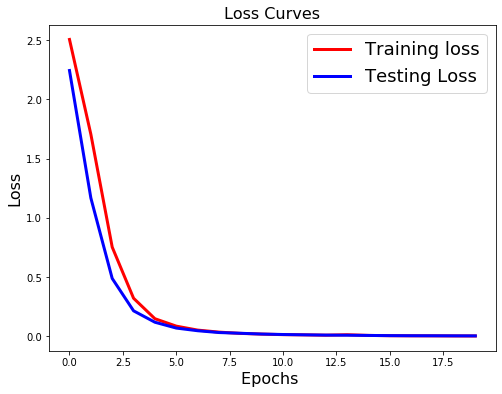

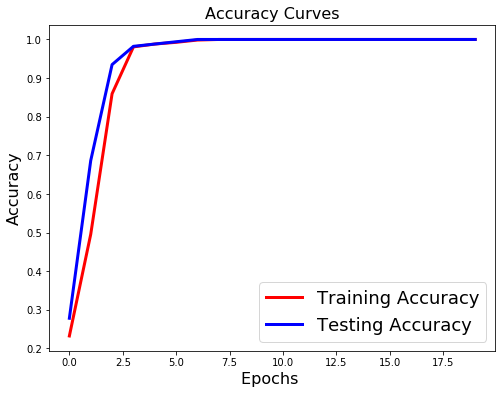

In [71]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Testing Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Testing Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [73]:
history.history

{'loss': [2.504704475402832,
  1.7049403190612793,
  0.752704381942749,
  0.3212074637413025,
  0.14852362871170044,
  0.08594032377004623,
  0.05256177857518196,
  0.03550804406404495,
  0.02474077418446541,
  0.01879918947815895,
  0.014194306917488575,
  0.012351252138614655,
  0.009621916338801384,
  0.013401437550783157,
  0.007741998415440321,
  0.005195681005716324,
  0.004404726438224316,
  0.00407278910279274,
  0.003329457249492407,
  0.0029412060976028442],
 'accuracy': [0.23224851489067078,
  0.4955621361732483,
  0.8594674468040466,
  0.9807692170143127,
  0.9881656765937805,
  0.9926035404205322,
  0.9985207319259644,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [2.242680788040161,
  1.1672664880752563,
  0.48826584219932556,
  0.21506190299987793,
  0.1188390851020813,
  0.06967820972204208,
  0.04718637466430664,
  0.03187333792448044,
  0.025774233043193817,
  0.019163768738508224,
  0.015328842215240002,
  0.